In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [2]:
RAWDATA = pd.read_csv("datawithcontent.csv")

In [3]:
RAWDATA.drop(RAWDATA[RAWDATA["Language"] == "Markdown"].index, inplace=True)

In [4]:
RAWDATA.head()

,Language,Path,Content
33,YAML,C:\Users\vincent\Documents\TEMP\finalproj_reso...,sauce_connect: true\nloopback: airtap.local\nb...
34,JSON,C:\Users\vincent\Documents\TEMP\finalproj_reso...,"{\n ""$schema"": ""./node_modules/@angular/cli/l..."
35,JSON,C:\Users\vincent\Documents\TEMP\finalproj_reso...,"{\n ""plugins"": [\n ""@babel/plugin-syntax-c..."
36,JavaScript,C:\Users\vincent\Documents\TEMP\finalproj_reso...,require('dotenv').config({ path: '../.env' });...
37,JavaScript,C:\Users\vincent\Documents\TEMP\finalproj_reso...,module.exports = {\n presets: [\n '@babel/...


In [5]:
RAWDATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180407 entries, 33 to 219229
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Language  180407 non-null  object
 1   Path      180407 non-null  object
 2   Content   180193 non-null  object
dtypes: object(3)
memory usage: 5.5+ MB


In [6]:
languages = RAWDATA.Language.unique()
languages_distrib = RAWDATA.Language.value_counts()

In [7]:
data = RAWDATA.copy()

In [8]:
# Change all to JavaScript or Not JavaScript
for index, row in data.iterrows():
    if not row["Language"] == "JavaScript":
        data.at[index, "Language"] = "Not JavaScript"

In [9]:
data.drop(columns=["Path"], inplace=True)
data.dropna(inplace=True)

In [10]:
data

,Language,Content
33,Not JavaScript,sauce_connect: true\nloopback: airtap.local\nb...
34,Not JavaScript,"{\n ""$schema"": ""./node_modules/@angular/cli/l..."
35,Not JavaScript,"{\n ""plugins"": [\n ""@babel/plugin-syntax-c..."
36,JavaScript,require('dotenv').config({ path: '../.env' });...
37,JavaScript,module.exports = {\n presets: [\n '@babel/...
...,...,...
219225,Not JavaScript,"#include ""pch.h""\n#include ""Settings.h""\n\n#in..."
219226,Not JavaScript,﻿// Copyright (c) Brice Lambson\n// The Brice ...
219227,Not JavaScript,#pragma once\n\n#include <unordered_set>\n\n#i...
219228,Not JavaScript,/* ###\n * IP: GHIDRA\n *\n * Licensed under t...


In [11]:
training, testing = train_test_split(data, train_size=0.7) 

In [12]:
display(training.Language.value_counts())
display(testing.Language.value_counts())

Not JavaScript    101388
JavaScript         24747
Name: Language, dtype: int64

Not JavaScript    43297
JavaScript        10761
Name: Language, dtype: int64

In [13]:
X_training, Y_training = training["Content"].to_numpy(), training["Language"].to_numpy()
X_testing, Y_testing = testing["Content"].to_numpy(), testing["Language"].to_numpy()

In [14]:
np.savetxt("raw_X_testing.csv", X_testing, delimiter=',', fmt='%s', encoding="utf-8")

In [15]:
len(Y_testing)

54058

In [16]:
# Vectorize Data
vectorize = CountVectorizer()

X_training = vectorize.fit_transform(X_training)
X_testing = vectorize.transform(X_testing)

---
# Decision Tree Classifier

In [24]:
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier().fit(X_training, Y_training)

In [25]:
Y_predicted = decision_tree_model.predict(X_testing)

In [26]:
Y_predicted

array(['Not JavaScript', 'Not JavaScript', 'JavaScript', ...,
       'Not JavaScript', 'Not JavaScript', 'Not JavaScript'], dtype=object)

In [27]:
decision_tree_confusion_matrix = confusion_matrix(Y_testing, Y_predicted)

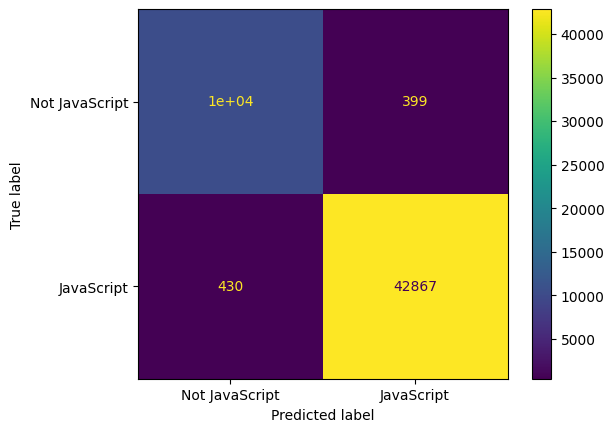

In [28]:
ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix, display_labels=["Not JavaScript", "JavaScript"]).plot()

In [29]:
# Get correct percentage
num_incorrect = 0

for i in range(0, len(Y_testing)):
    if Y_predicted[i] != Y_testing[i]:
        num_incorrect += 1
    # print(Y_testing[i])

percent_accuracy = 1 - (num_incorrect / len(Y_testing))
print(f"The accuracy of the Decision Tree model is {percent_accuracy}")

The accuracy of the Decision Tree model is 0.9846646194827777


In [ ]:
pickle.dump(decision_tree_model, open("decisiontreeclassifier.pkl", "wb"))

---
# Support Vector Machine

In [18]:
# Support Vector Machine model
svm_model = LinearSVC().fit(X_training, Y_training)

c:\Users\vincent\Documents\dsvenv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
Y_predicted = svm_model.predict(X_testing)

In [20]:
svm_model_confusion_matrix = confusion_matrix(Y_testing, Y_predicted)

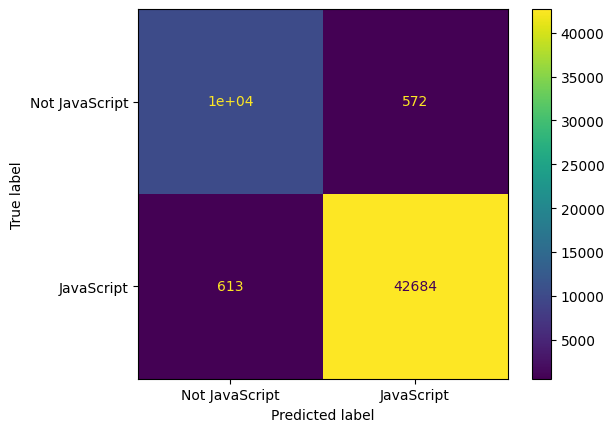

In [21]:
ConfusionMatrixDisplay(confusion_matrix=svm_model_confusion_matrix, display_labels=["Not JavaScript", "JavaScript"]).plot()

In [22]:
# Get correct percentage
num_incorrect = 0

for i in range(0, len(Y_testing)):
    if Y_predicted[i] != Y_testing[i]:
        num_incorrect += 1
    # print(Y_testing[i])

percent_accuracy = 1 - (num_incorrect / len(Y_testing))
print(f"The accuracy of the Decision Tree model is {percent_accuracy}")

The accuracy of the Decision Tree model is 0.9780791002256836


In [23]:
pickle.dump(svm_model_confusion_matrix, open("linearsvm.pkl", "wb"))

---
# Model Testing

In [43]:
# Read files
testcase1 = open("testcase1.js", "r").read()
testcase2 = open("testcase2.md", "r", encoding="utf-8").read()
testcase3 = open("testcase3.js", "r").read()
testcase4 = open("testcase4.cpp", "r").read()

testcases = np.array([testcase1, testcase2, testcase3, testcase4])

In [38]:
X_testcases = vectorize.transform(testcases)
Y_testcases = np.array(['JavaScript', 'Not JavaScript', 'JavaScript', 'Not JavaScript'])

In [40]:
testcase_decisiontree_predict = decision_tree_model.predict(X_testcases)
display(testcase_decisiontree_predict)
display(Y_testcases)

array(['Not JavaScript', 'Not JavaScript', 'Not JavaScript',
       'Not JavaScript'], dtype=object)

array(['JavaScript', 'Not JavaScript', 'JavaScript', 'Not JavaScript'],
      dtype='<U14')

In [41]:
testcase_svm_predict = svm_model.predict(X_testcases)
display(testcase_decisiontree_predict)
display(Y_testcases)

array(['Not JavaScript', 'Not JavaScript', 'Not JavaScript',
       'Not JavaScript'], dtype=object)

array(['JavaScript', 'Not JavaScript', 'JavaScript', 'Not JavaScript'],
      dtype='<U14')